In [1]:
import acquire
import prep
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import wrangle
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.metrics import mean_squared_error, explained_variance_score

pd.set_option('display.max_columns', None)
pd.set_option('float_format', '{:f}'.format)

acquire.py functions loaded successfully
prep.py functions loaded successfully
wrangle.py functions loaded successfully


After creating the Acquire and Prep files, I imported them to assess the data further

In [2]:
df = prep.prep_zillow_data()
df.head()

,parcelid,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,tdate,propertylandusedesc,is_la_county,is_orange_county,is_ventura_county
0,14297519,261.000000,3.500000,4.000000,3.500000,3100.000000,3100.000000,6059.000000,3.000000,33634931.000000,-117869207.000000,4506.000000,122,60590630.072012,53571.000000,1286.000000,96978.000000,0.000000,1998.000000,485713.000000,1023282.000000,2016.000000,537569.000000,11013.720000,60590630072012.000000,0.025595,2017-01-01,Single Family Residential,0,1,0
1,17052889,261.000000,1.000000,2.000000,1.000000,1465.000000,1465.000000,6111.000000,1.000000,34449266.000000,-119281531.000000,12647.000000,1110,61110010.023006,13091.000000,2061.000000,97099.000000,5.000000,1967.000000,88000.000000,464000.000000,2016.000000,376000.000000,5672.480000,61110010023006.000000,0.055619,2017-01-01,Single Family Residential,0,0,1
2,14186244,261.000000,2.000000,3.000000,2.000000,1243.000000,1243.000000,6059.000000,2.000000,33886168.000000,-117823170.000000,8432.000000,122,60590218.022012,21412.000000,1286.000000,97078.000000,6.000000,1962.000000,85289.000000,564778.000000,2016.000000,479489.000000,6488.300000,60590218022012.000000,0.005383,2017-01-01,Single Family Residential,0,1,0
3,12177905,261.000000,3.000000,4.000000,3.000000,2376.000000,2376.000000,6037.000000,3.000000,34245180.000000,-118240722.000000,13038.000000,0101,60373001.001006,396551.000000,3101.000000,96330.000000,0.000000,1970.000000,108918.000000,145143.000000,2016.000000,36225.000000,1777.510000,60373001001006.000000,-0.103410,2017-01-01,Single Family Residential,1,0,0
4,10887214,266.000000,3.000000,3.000000,3.000000,1312.000000,1312.000000,6037.000000,3.000000,34185120.000000,-118414640.000000,278581.000000,010C,60371236.012000,12447.000000,3101.000000,96451.000000,0.000000,1964.000000,73681.000000,119407.000000,2016.000000,45726.000000,1533.890000,60371236012000.000000,0.006940,2017-01-01,Condominium,1,0,0


In [3]:
#Check for nulls in the data
df.isnull().sum().sort_values(ascending = False)

is_ventura_county               0
regionidcity                    0
propertylandusetypeid           0
bathroomcnt                     0
bedroomcnt                      0
calculatedbathnbr               0
calculatedfinishedsquarefeet    0
finishedsquarefeet12            0
fips                            0
fullbathcnt                     0
latitude                        0
longitude                       0
lotsizesquarefeet               0
propertycountylandusecode       0
rawcensustractandblock          0
regionidcounty                  0
is_orange_county                0
regionidzip                     0
roomcnt                         0
yearbuilt                       0
structuretaxvaluedollarcnt      0
taxvaluedollarcnt               0
assessmentyear                  0
landtaxvaluedollarcnt           0
taxamount                       0
censustractandblock             0
logerror                        0
tdate                           0
propertylandusedesc             0
is_la_county  

In [4]:
X_train, y_train, X_validate, y_validate, X_test, y_test = wrangle.train_validate_test(df)

In [5]:
df.shape

(75538, 31)

# Explore the Data

In [6]:
X_train.describe()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
count,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000,42301.000000
mean,262.024775,2.268516,3.037659,2.268563,1737.939636,6048.843408,2.201242,34008193.550413,-118202423.906196,29909.242102,96579.704249,1.497979,1968.689835,466079.760242,0.016004,0.651308,0.268457,0.080235
std,3.759741,0.871648,1.010875,0.871612,829.951031,20.713310,0.856426,266456.490405,360225.437520,122937.801973,3321.120831,2.833275,23.604089,498616.093916,0.166024,0.476562,0.443162,0.271659
min,246.000000,1.000000,1.000000,1.000000,242.000000,6037.000000,1.000000,33339527.000000,-119447944.000000,236.000000,95982.000000,0.000000,1824.000000,1000.000000,-4.655420,0.000000,0.000000,0.000000
25%,261.000000,2.000000,2.000000,2.000000,1176.000000,6037.000000,2.000000,33812995.000000,-118416540.000000,5940.000000,96197.000000,0.000000,1953.000000,206586.000000,-0.024077,0.000000,0.000000,0.000000
50%,261.000000,2.000000,3.000000,2.000000,1530.000000,6037.000000,2.000000,34020302.000000,-118178000.000000,7547.000000,96393.000000,0.000000,1970.000000,357000.000000,0.006437,1.000000,0.000000,0.000000
75%,266.000000,3.000000,4.000000,3.000000,2073.000000,6059.000000,3.000000,34176037.000000,-117926376.000000,21431.000000,96987.000000,0.000000,1987.000000,563328.000000,0.038434,1.000000,1.000000,0.000000
max,275.000000,5.500000,7.000000,5.500000,12616.000000,6111.000000,5.000000,34812397.000000,-117554636.000000,6971010.000000,399675.000000,13.000000,2016.000000,23858374.000000,3.394544,1.000000,1.000000,1.000000


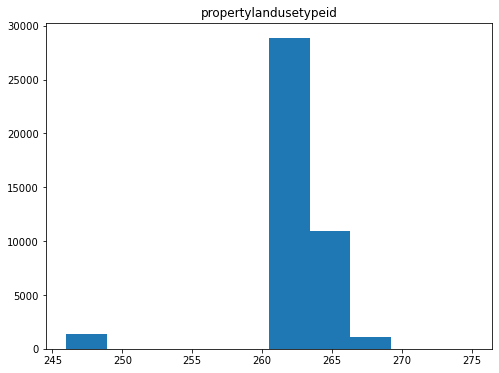

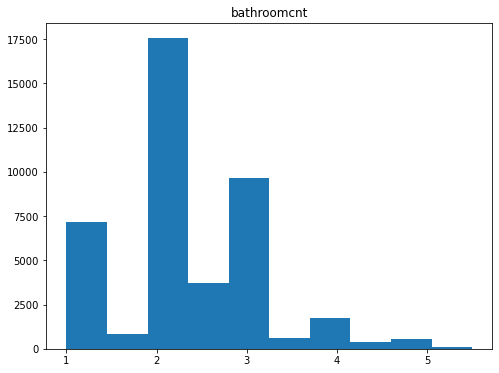

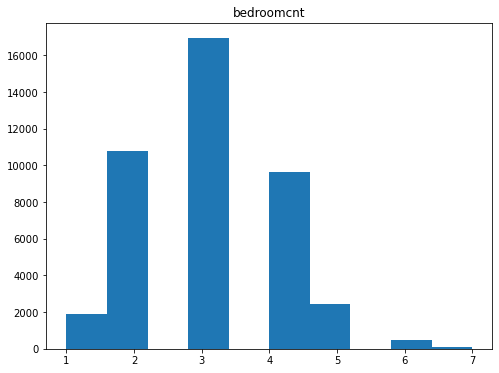

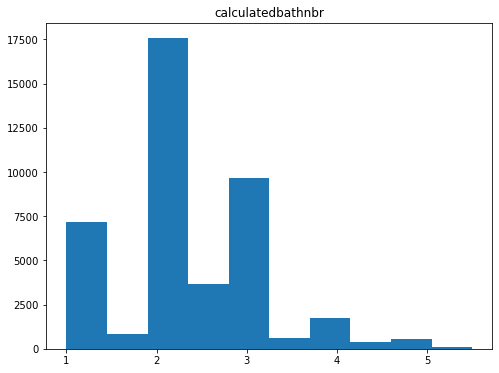

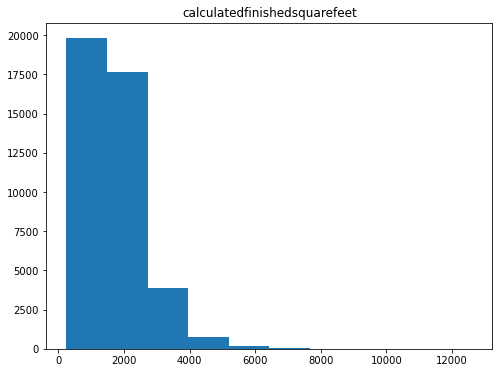

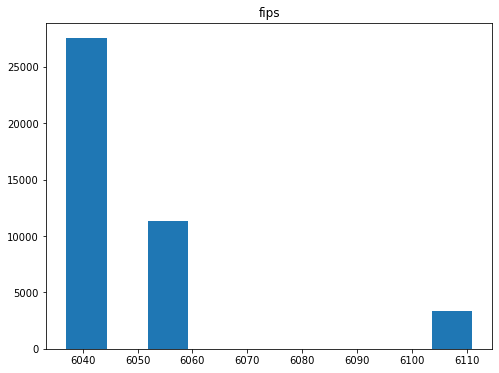

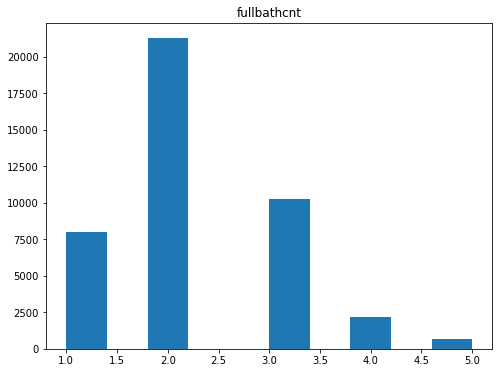

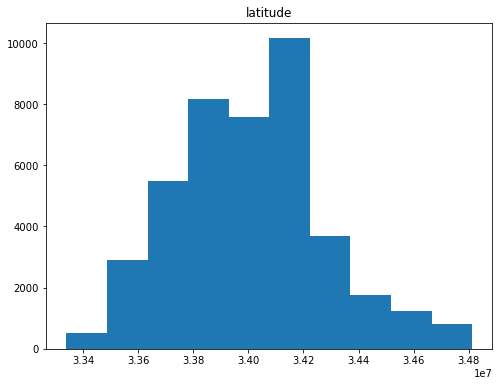

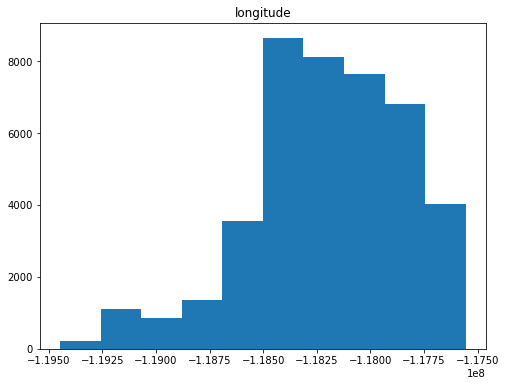

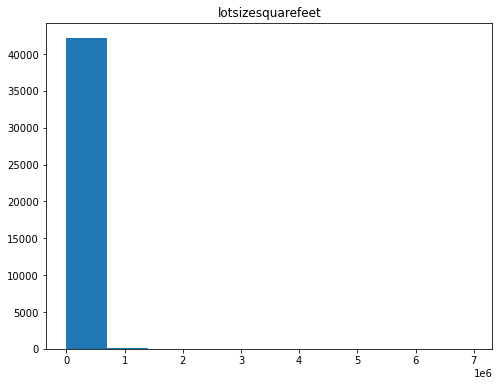

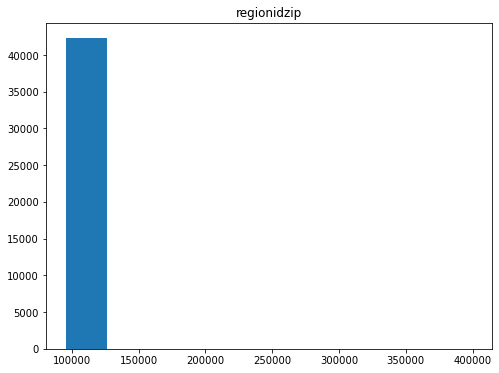

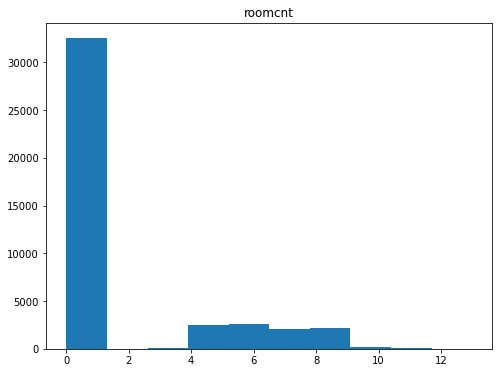

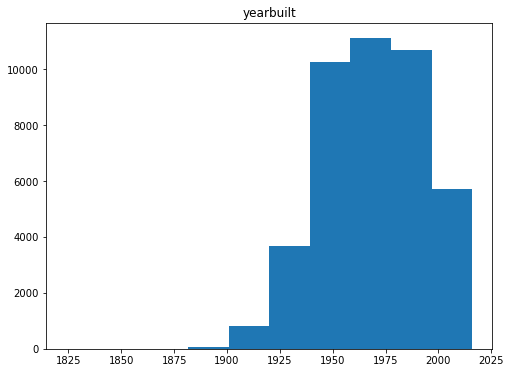

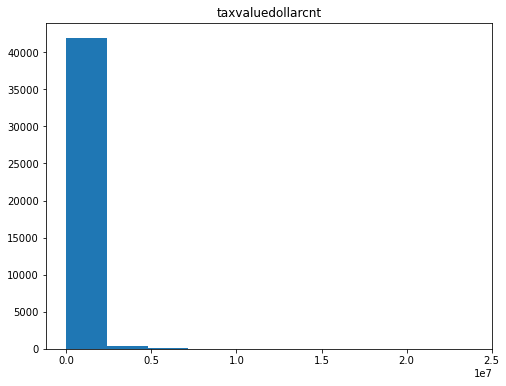

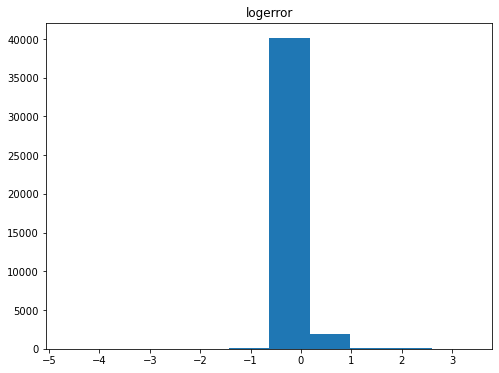

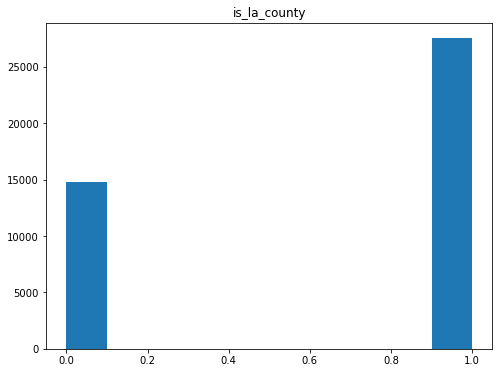

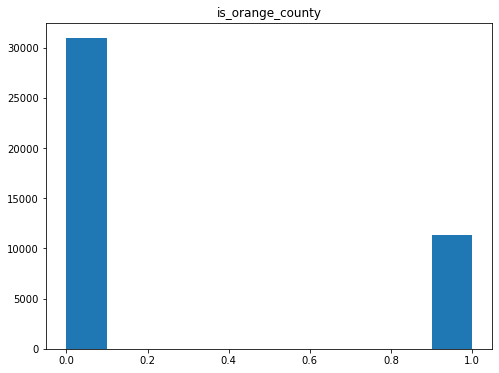

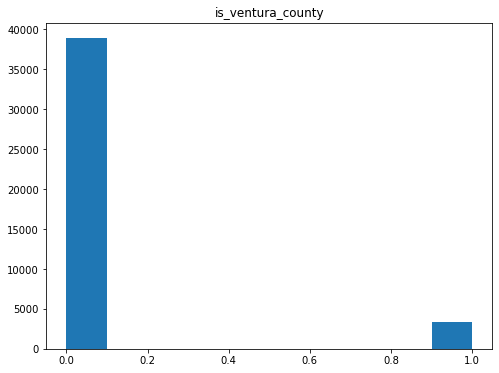

In [7]:
for column in X_train.columns:
    plt.figure(figsize=(8,6))
    plt.hist(X_train[column])
    plt.title(column)
    plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
    plt.show()

# Takeaways
- Log error is pretty accurate and only deviates about 2 from zero but overall very accurate.

- There are fewer outliers present after I removed houses that have more than 8 bedrooms, since the buying market is very niche at those price points.

- There are quite a lot of homes still being sold that were built before the 70's

- There also appears to be a reduction in home production in the 2000's, unsure if this was due to market crash or lack of space.

- Room count does not appear to be an accurate feature to use for our predictions

- Fips would be a good feature to cluster on, this would aide in addressing the outliers

- I still like bedroom, bathroom, full bathroom as features for my modeling. These features aided a lot in the

- Calculated bath and bedroom count is redundant info based on the histograms

In [8]:
X_train.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
10782,261.000000,2.000000,3.000000,2.000000,1606.000000,6037.000000,2.000000,33821795.000000,-118097424.000000,5027.000000,96242.000000,0.000000,1953.000000,74502.000000,0.240991,1,0,0
58461,261.000000,3.000000,4.000000,3.000000,3785.000000,6037.000000,3.000000,34223192.000000,-118486581.000000,14028.000000,96369.000000,0.000000,1985.000000,468405.000000,-0.076852,1,0,0
33158,269.000000,3.000000,3.000000,3.000000,2071.000000,6037.000000,3.000000,34406845.000000,-118438367.000000,22125.000000,96401.000000,0.000000,2006.000000,357569.000000,0.000090,1,0,0
50675,261.000000,2.500000,4.000000,2.500000,4398.000000,6059.000000,2.000000,33814623.000000,-117805673.000000,20110.000000,97059.000000,11.000000,1967.000000,847561.000000,0.121391,0,1,0
65079,266.000000,2.000000,2.000000,2.000000,1155.000000,6059.000000,2.000000,33624900.000000,-117933000.000000,29969.280611,96981.000000,0.000000,1971.000000,242529.000000,-0.062254,0,1,0


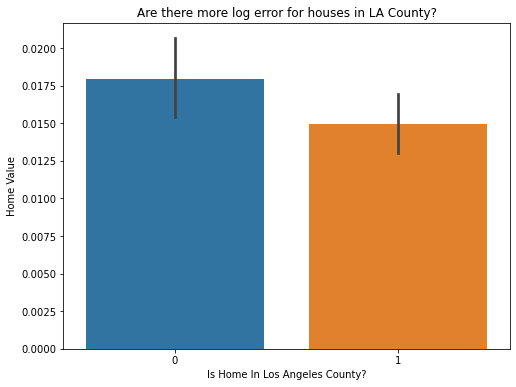

In [9]:
plt.figure(figsize=(8,6))
sns.barplot(X_train.is_la_county, X_train.logerror)
plt.title("Are there more log error for houses in LA County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Los Angeles County?')
plt.show()

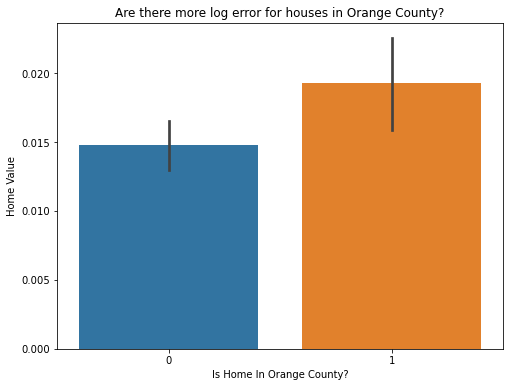

In [10]:
plt.figure(figsize=(8,6))
sns.barplot(X_train.is_orange_county, X_train.logerror)
plt.title("Are there more log error for houses in Orange County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Orange County?')
plt.show()

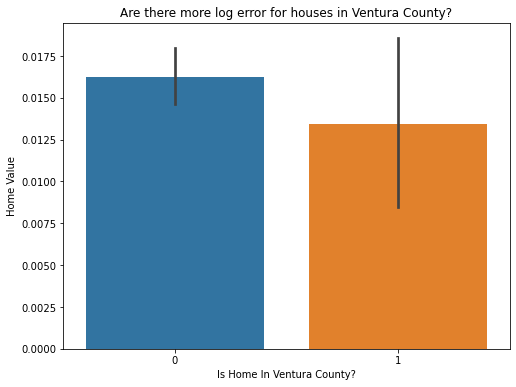

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(X_train.is_ventura_county, X_train.logerror)
plt.title("Are there more log error for houses in Ventura County?")
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.ylabel('Home Value')
plt.xlabel('Is Home In Ventura County?')
plt.show()

# Hypothesis Testing

### Hypothesis Test 1

$H$0 - There is no difference in price between houses in Orange County and Los Angeles/Ventura Counties

$H$a - There is a differen between houses in Orange County and Los Angeles/Ventura Counties

In [12]:
la_county = X_train[X_train.is_la_county == 1]
not_la_county = X_train[X_train.is_la_county == 0]

stats.levene(la_county.logerror, not_la_county.logerror)

LeveneResult(statistic=47.34570846424668, pvalue=6.033474711527957e-12)

In [13]:
stats.ttest_ind(la_county.logerror, 
                not_la_county.logerror, 
                equal_var=True)

Ttest_indResult(statistic=-1.777254255979233, pvalue=0.07553360020608871)

## Conclusion
- p < alpha of .05, we reject the null hypothesis and there is a difference in log error for homes in LA county

Is There A Relationship Between Home Value And Square Feet?


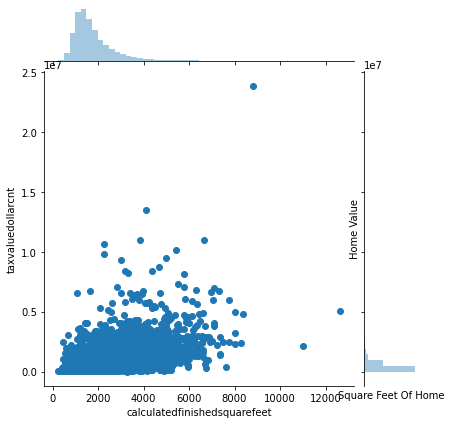

In [14]:
print('Is There A Relationship Between Home Value And Square Feet?')
sns.jointplot(x = 'calculatedfinishedsquarefeet', y = 'taxvaluedollarcnt', data=X_train)
plt.xlabel("Square Feet Of Home")
plt.ylabel("Home Value")
plt.show()

## Conclusion
- There appears to be a linear relationship between square feet of home and the value of the home
- This will be valueable when we begin our modeling and selecting best features

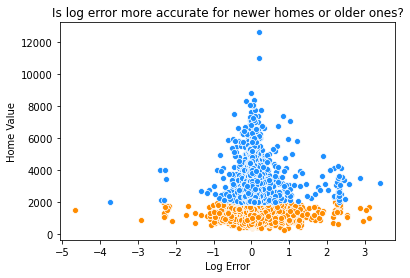

In [15]:
sns.scatterplot(x='logerror', y='calculatedfinishedsquarefeet',
               data=X_train[X_train.calculatedfinishedsquarefeet<2000], color='darkorange')
sns.scatterplot(x='logerror', y='calculatedfinishedsquarefeet',
               data=X_train[X_train.calculatedfinishedsquarefeet>=2000], 
                color='dodgerblue')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title("Is log error more accurate for newer homes or older ones?")
plt.ylabel('Home Value')
plt.xlabel('Log Error')
plt.show()

## Conclusion
- It appears that most of the error occurs in the homes older than 2000
- This information will be very helpful to consider when we start assessing clusters

## Hypothesis Test 2

In [16]:
sqft_greater_than_1500 = X_train[X_train.calculatedfinishedsquarefeet >= 1500]
sqft_less_than_1500 = X_train[X_train.calculatedfinishedsquarefeet < 1500]

stats.levene(sqft_greater_than_1500.logerror, sqft_less_than_1500.logerror)

LeveneResult(statistic=0.14707104739028531, pvalue=0.7013521599662182)

## Conclusion
- p > alpha of .05, we fail to reject the null and although the graph appears to show some correlation that log error is higher on houses that are less than 1500 sqft, it is not related.

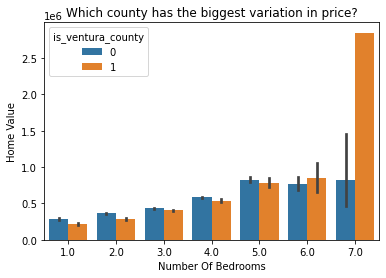

In [17]:
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt',
               data=X_train, hue='is_ventura_county')
plt.title("Which county has the biggest variation in price?")
plt.ylabel('Home Value')
plt.xlabel('Number Of Bedrooms')
plt.show()

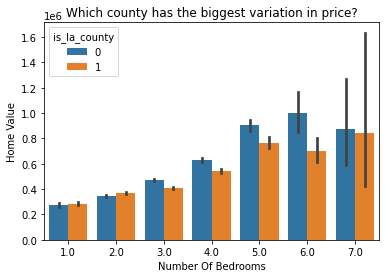

In [18]:
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt',
               data=X_train, hue='is_la_county')
plt.title("Which county has the biggest variation in price?")
plt.ylabel('Home Value')
plt.xlabel('Number Of Bedrooms')
plt.show()

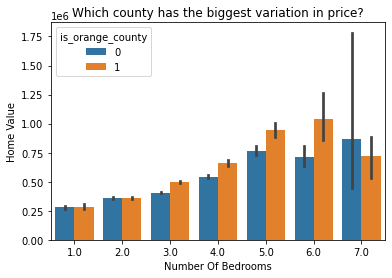

In [19]:
sns.barplot(x='bedroomcnt', y='taxvaluedollarcnt',
               data=X_train, hue='is_orange_county')
plt.title("Which county has the biggest variation in price?")
plt.ylabel('Home Value')
plt.xlabel('Number Of Bedrooms')
plt.show()

## Conclusion
- The most variance in price valuation appears to be in ventura which explains why the original model was innaccurate on bigger homes
- The most consistent changes in price appears to be orange county
- The most linear prices is going to be la county which the original model preformed best on those houses last time

In [20]:
X_train.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
10782,261.000000,2.000000,3.000000,2.000000,1606.000000,6037.000000,2.000000,33821795.000000,-118097424.000000,5027.000000,96242.000000,0.000000,1953.000000,74502.000000,0.240991,1,0,0
58461,261.000000,3.000000,4.000000,3.000000,3785.000000,6037.000000,3.000000,34223192.000000,-118486581.000000,14028.000000,96369.000000,0.000000,1985.000000,468405.000000,-0.076852,1,0,0
33158,269.000000,3.000000,3.000000,3.000000,2071.000000,6037.000000,3.000000,34406845.000000,-118438367.000000,22125.000000,96401.000000,0.000000,2006.000000,357569.000000,0.000090,1,0,0
50675,261.000000,2.500000,4.000000,2.500000,4398.000000,6059.000000,2.000000,33814623.000000,-117805673.000000,20110.000000,97059.000000,11.000000,1967.000000,847561.000000,0.121391,0,1,0
65079,266.000000,2.000000,2.000000,2.000000,1155.000000,6059.000000,2.000000,33624900.000000,-117933000.000000,29969.280611,96981.000000,0.000000,1971.000000,242529.000000,-0.062254,0,1,0


In [21]:
X_train_scaled, X_validate_scaled, X_test_scaled = wrangle.min_max_scale(X_train, X_validate, X_test)

In [22]:
from sklearn.cluster import KMeans
X = X_train_scaled[['propertylandusetypeid', 'bathroomcnt', 'bedroomcnt', 'calculatedbathnbr', 
           'calculatedfinishedsquarefeet', 'fips', 'fullbathcnt', 'latitude', 'longitude', 
           'lotsizesquarefeet', 'regionidzip', 'roomcnt', 'yearbuilt', 'taxvaluedollarcnt']]
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)

KMeans(n_clusters=4)

In [23]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt
0,0.543114,0.148272,0.273624,0.148272,0.086880,0.007576,0.166227,0.501938,0.641149,0.005312,0.001276,0.000303,0.694826,0.013824
1,0.567198,0.298632,0.373846,0.298632,0.132340,1.000000,0.291249,0.612008,0.240032,0.001993,0.003103,0.493110,0.807180,0.018840
2,0.548749,0.517947,0.446284,0.517947,0.179936,0.037145,0.573916,0.504079,0.640257,0.005233,0.001770,0.009191,0.804975,0.030000
3,0.570148,0.268359,0.334907,0.268406,0.116077,0.297297,0.254269,0.247529,0.859116,0.001900,0.003138,0.324768,0.790663,0.018852


In [24]:
X.shape

(42301, 14)

In [25]:
X_train_scaled['cluster'] = kmeans.labels_
X_train['cluster'] = kmeans.labels_

In [26]:
X_train.groupby('cluster').mean()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county
cluster,,,,,,,,,,,,,,,,,,
0,261.749879,1.667331,2.642007,1.667331,1317.159665,6037.557142,1.665014,34078884.678808,-118234119.210895,37270.179478,96369.309352,0.003718,1957.405253,330805.531602,0.013931,0.974675,0.025325,0.000000
1,262.448733,2.343842,3.243076,2.343842,1879.579028,6111.000000,2.164997,34240934.538303,-118993489.993518,14128.057869,96924.268619,6.410430,1978.978650,450471.213023,0.013459,0.000000,0.000000,1.000000
2,261.913799,3.330744,3.677858,3.330744,2468.477545,6039.746948,3.295690,34082024.588605,-118235790.596744,36716.856055,96519.444671,0.119497,1978.554434,716701.984092,0.019549,0.875139,0.124861,0.000000
3,262.534711,2.207372,3.008704,2.207580,1678.161481,6059.000000,2.016858,33704068.052328,-117821355.101825,13481.576461,96934.863013,4.220638,1975.805426,450748.629195,0.016925,0.000000,1.000000,0.000000


In [27]:
X_train_scaled.groupby('cluster').size()

cluster
0    18559
1     3394
2    10812
3     9536
dtype: int64

[Text(0, 0.5, 'Square Footage Of Home'), Text(0.5, 0, 'Log Error')]

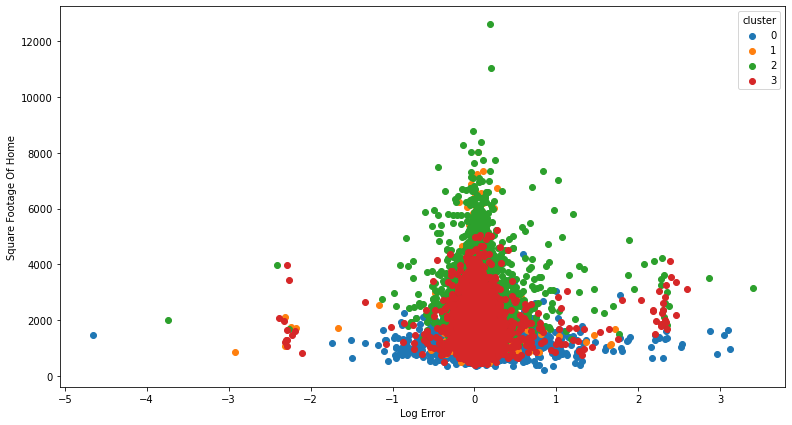

In [28]:
fig, ax = plt.subplots(figsize=(13, 7))

for cluster, subset in X_train.groupby('cluster'):
    ax.scatter(subset.logerror, subset.calculatedfinishedsquarefeet, label=cluster)
ax.legend(title='cluster')
ax.set(ylabel='Square Footage Of Home', xlabel='Log Error')


In [29]:
kmeans.inertia_

6715.594329093665

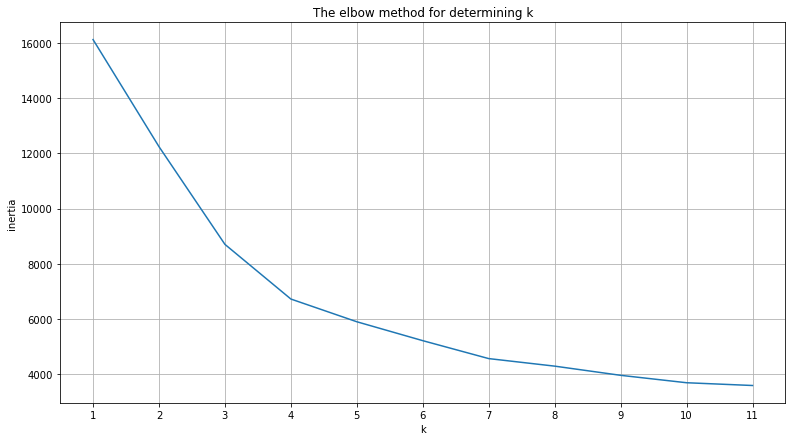

In [30]:
output = {}

for k in range(1, 12):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(X)
    output[k] = kmeans.inertia_

ax = pd.Series(output).plot(figsize=(13, 7))
ax.set(xlabel='k', ylabel='inertia', xticks=range(1, 12), title='The elbow method for determining k')
ax.grid()

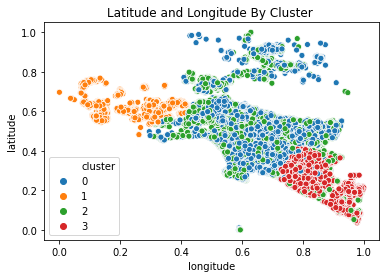

In [31]:
sns.scatterplot(x='longitude', y='latitude', hue='cluster', data=X_train_scaled, palette='tab10')
plt.title("Latitude and Longitude By Cluster ")
plt.show()

Text(0.5, 1.0, 'Year Built vs Log Error By Clusters')

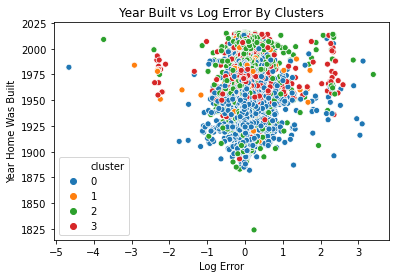

In [32]:
sns.scatterplot(x='logerror', y='yearbuilt', hue='cluster', data=X_train, palette='tab10')
plt.ylabel('Year Home Was Built')
plt.xlabel('Log Error')
plt.gcf().axes[0].yaxis.get_major_formatter().set_scientific(False)
plt.title('Year Built vs Log Error By Clusters')

In [33]:
X_train_scaled.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,cluster
10782,0.517241,0.222222,0.333333,0.222222,0.110231,0.000000,0.250000,0.327434,0.713312,0.000687,0.000856,0.000000,0.671875,0.003081,0
58461,0.517241,0.444444,0.500000,0.444444,0.286326,0.000000,0.500000,0.599961,0.507769,0.001979,0.001274,0.000000,0.838542,0.019592,2
33158,0.793103,0.444444,0.333333,0.444444,0.147810,0.000000,0.500000,0.724652,0.533234,0.003140,0.001380,0.000000,0.947917,0.014946,2
50675,0.517241,0.333333,0.500000,0.333333,0.335866,0.297297,0.250000,0.322565,0.867408,0.002851,0.003546,0.846154,0.744792,0.035484,3
65079,0.689655,0.222222,0.166667,0.222222,0.073784,0.297297,0.250000,0.193753,0.800157,0.004265,0.003290,0.000000,0.765625,0.010124,3


In [34]:
X_train.head()

,propertylandusetypeid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,regionidzip,roomcnt,yearbuilt,taxvaluedollarcnt,logerror,is_la_county,is_orange_county,is_ventura_county,cluster
10782,261.000000,2.000000,3.000000,2.000000,1606.000000,6037.000000,2.000000,33821795.000000,-118097424.000000,5027.000000,96242.000000,0.000000,1953.000000,74502.000000,0.240991,1,0,0,0
58461,261.000000,3.000000,4.000000,3.000000,3785.000000,6037.000000,3.000000,34223192.000000,-118486581.000000,14028.000000,96369.000000,0.000000,1985.000000,468405.000000,-0.076852,1,0,0,2
33158,269.000000,3.000000,3.000000,3.000000,2071.000000,6037.000000,3.000000,34406845.000000,-118438367.000000,22125.000000,96401.000000,0.000000,2006.000000,357569.000000,0.000090,1,0,0,2
50675,261.000000,2.500000,4.000000,2.500000,4398.000000,6059.000000,2.000000,33814623.000000,-117805673.000000,20110.000000,97059.000000,11.000000,1967.000000,847561.000000,0.121391,0,1,0,3
65079,266.000000,2.000000,2.000000,2.000000,1155.000000,6059.000000,2.000000,33624900.000000,-117933000.000000,29969.280611,96981.000000,0.000000,1971.000000,242529.000000,-0.062254,0,1,0,3


In [35]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
## Assessing the RFE using a linear regression model
lm = LinearRegression()

rfe = RFE(lm, 7)

lm_X_rfe = rfe.fit_transform(X_train_scaled,y_train)

In [37]:
## Here we want to filter through and return only the best features
mask = rfe.support_ 
rfe_features = X_train_scaled.columns[mask]
print(f'selected {len(rfe_features)} features:', ', '.join(rfe_features))

selected 7 features: bathroomcnt, calculatedbathnbr, calculatedfinishedsquarefeet, fullbathcnt, lotsizesquarefeet, regionidzip, taxvaluedollarcnt


In [38]:
lm.fit(lm_X_rfe, y_train)

LinearRegression()

In [39]:
print("Linear Model:", lm)

print("intercept: ", lm.intercept_)

print("features: ", rfe_features)

print("coefficients: ", lm.coef_)

Linear Model: LinearRegression()
intercept:  [0.00395909]
features:  Index(['bathroomcnt', 'calculatedbathnbr', 'calculatedfinishedsquarefeet',
       'fullbathcnt', 'lotsizesquarefeet', 'regionidzip', 'taxvaluedollarcnt'],
      dtype='object')
coefficients:  [[-0.22911211  0.26320517  0.15270656 -0.03484881  0.09583408 -0.02631947
  -0.30369771]]


In [40]:
## Here we're going to add a column that will make property value predictions using the linear model
y_train['yhat_lm'] = lm.predict(lm_X_rfe)

y_train.head()

,logerror,yhat_lm
10782,0.240991,0.018764
58461,-0.076852,0.039617
33158,0.000090,0.019984
50675,0.121391,0.047304
65079,-0.062254,0.011338


In [41]:
## Checking the mean squared error of the model
RMSE_lm = np.sqrt(mean_squared_error(y_train.logerror, y_train.yhat_lm))
RMSE_lm

0.16580804565435792

In [42]:
r2_lm = lm.score(lm_X_rfe, y_train.logerror)

r2_lm

0.002574653064620902

In [43]:
output = "{} = {:.4} + {:.2} * {} + {:.3} * {}".format(
    y_train.columns[0],
    lm.intercept_[0],
    lm.coef_[0][0],
    rfe_features[0],
    lm.coef_[0][1],
    rfe_features[1],
)
output

'logerror = 0.003959 + -0.23 * bathroomcnt + 0.263 * calculatedbathnbr'

0.16602203961632636
0.0


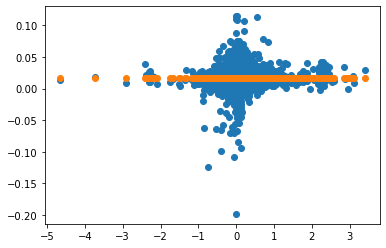

In [44]:
y_train['yhat_baseline'] = df['logerror'].mean()

# compute the RMSE
RMSE_bl = np.sqrt(mean_squared_error(y_train.logerror, y_train.yhat_baseline))
print(RMSE_bl)

# no need to compute R-2 because it will be a 0! But we will demonstrate here:
evs = explained_variance_score(y_train.logerror, y_train.yhat_baseline)
print(evs)
plt.scatter(y_train.logerror, y_train.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_train.logerror, y_train.yhat_baseline, label='Baseline Predicitions', marker='o')

In [45]:
from sklearn.preprocessing import PolynomialFeatures

poly_X_rfe = rfe.fit_transform(X_train,y_train)

## We're starting with 4 degrees as a rough starting point
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(poly_X_rfe)

poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x5^2',
 'x5 x6',
 'x6^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0^2 x4',
 'x0^2 x5',
 'x0^2 x6',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x1 x5',
 'x0 x1 x6',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x2 x4',
 'x0 x2 x5',
 'x0 x2 x6',
 'x0 x3^2',
 'x0 x3 x4',
 'x0 x3 x5',
 'x0 x3 x6',
 'x0 x4^2',
 'x0 x4 x5',
 'x0 x4 x6',
 'x0 x5^2',
 'x0 x5 x6',
 'x0 x6^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1^2 x4',
 'x1^2 x5',
 'x1^2 x6',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x2 x4',
 'x1 x2 x5',
 'x1 x2 x6',
 'x1 x3^2',
 'x1 x3 x4',
 'x1 x3 x5',
 'x1 x3 x6',
 'x1 x4^2',
 'x1 x4 x5',
 'x1 x4 x6',
 'x1 x5^2',
 'x1 x5 x6',
 'x1 x6^2',
 'x2^3',
 'x2^2 x3',
 'x2^2 x4',
 'x2^2 x5',
 'x2^2 x6',
 'x2 x3^

In [46]:
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y_train.logerror)
y_train['yhat_poly_1'] = lm_poly.predict(X_poly)

In [47]:
RMSE_poly = np.sqrt(mean_squared_error(y_train.logerror, y_train.yhat_poly_1))
RMSE_poly

0.04298788180990736

In [48]:
y_train.head()

,logerror,yhat_lm,yhat_baseline,yhat_poly_1
10782,0.240991,0.018764,0.016213,0.237529
58461,-0.076852,0.039617,0.016213,-0.134635
33158,0.000090,0.019984,0.016213,-0.015636
50675,0.121391,0.047304,0.016213,0.090993
65079,-0.062254,0.011338,0.016213,-0.062504


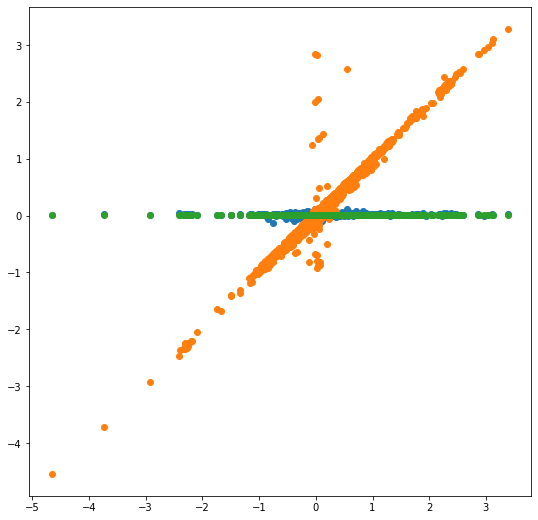

In [49]:
plt.figure(figsize=(9, 9))

plt.scatter(y_train.logerror, y_train.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_train.logerror, y_train.yhat_poly_1, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_train.logerror, y_train.yhat_baseline, label='Baseline Predicitions', marker='o')

In [50]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(poly_X_rfe)
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y_train.logerror)
y_train['yhat_poly_2'] = lm_poly.predict(X_poly)
RMSE_poly = np.sqrt(mean_squared_error(y_train.logerror, y_train.yhat_poly_2))
RMSE_poly

0.0004814244408983362

In [51]:
y_train.head()

,logerror,yhat_lm,yhat_baseline,yhat_poly_1,yhat_poly_2
10782,0.240991,0.018764,0.016213,0.237529,0.240762
58461,-0.076852,0.039617,0.016213,-0.134635,-0.076958
33158,0.000090,0.019984,0.016213,-0.015636,0.000066
50675,0.121391,0.047304,0.016213,0.090993,0.121820
65079,-0.062254,0.011338,0.016213,-0.062504,-0.062690


In [52]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(poly_X_rfe)
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y_train.logerror)
y_train['yhat_poly_3'] = lm_poly.predict(X_poly)
RMSE_poly = np.sqrt(mean_squared_error(y_train.logerror, y_train.yhat_poly_3))
RMSE_poly

0.012053260899780606

In [53]:
y_train['base_perc_error'] = ((y_train.logerror - y_train.yhat_baseline) / y_train.logerror) * 100
y_train.base_perc_error.sum()

2530951.1419222415

In [54]:
y_train.head()

,logerror,yhat_lm,yhat_baseline,yhat_poly_1,yhat_poly_2,yhat_poly_3,base_perc_error
10782,0.240991,0.018764,0.016213,0.237529,0.240762,0.237759,93.272266
58461,-0.076852,0.039617,0.016213,-0.134635,-0.076958,-0.053170,121.096628
33158,0.000090,0.019984,0.016213,-0.015636,0.000066,-0.000664,-17856.886205
50675,0.121391,0.047304,0.016213,0.090993,0.121820,0.089689,86.643782
65079,-0.062254,0.011338,0.016213,-0.062504,-0.062690,-0.069864,126.043777


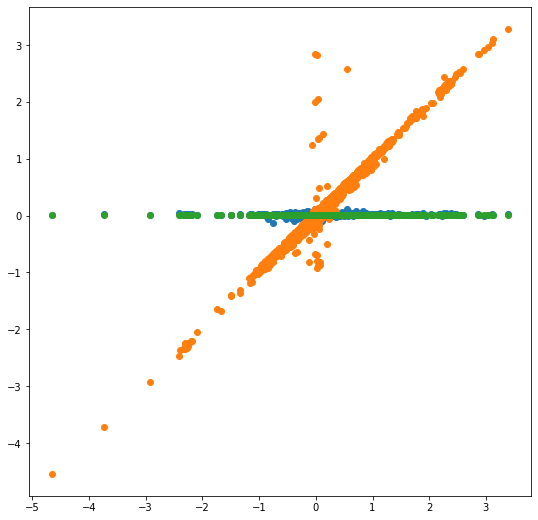

In [55]:
plt.figure(figsize=(9, 9))

plt.scatter(y_train.logerror, y_train.yhat_lm, label='Linear Regression Model Predictions', marker='o')
plt.scatter(y_train.logerror, y_train.yhat_poly_1, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_train.logerror, y_train.yhat_baseline, label='Baseline Predicitions', marker='o')

In [56]:
val_poly_X_rfe = rfe.fit_transform(X_validate,y_validate)

In [72]:
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(val_poly_X_rfe)
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y_validate.logerror)
y_validate['yhat_poly_1'] = lm_poly.predict(X_poly)
RMSE_poly = np.sqrt(mean_squared_error(y_validate.logerror, y_validate.yhat_poly_1))
RMSE_poly
print('{:.20f}'.format(RMSE_poly))

0.00000000000000017767


In [58]:
y_validate.head()

,logerror,yhat_poly_1
15680,0.054257,0.054257
65289,0.138552,0.138552
5275,-0.006489,-0.006489
60465,-0.109411,-0.109411
51437,0.000075,0.000075


In [71]:
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(val_poly_X_rfe)
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y_validate.logerror)
y_validate['yhat_poly_2'] = lm_poly.predict(X_poly)
RMSE_poly = np.sqrt(mean_squared_error(y_validate.logerror, y_validate.yhat_poly_2))
print('{:.20f}'.format(RMSE_poly))

0.00000000000003129622


In [60]:
y_validate.head()

,logerror,yhat_poly_1,yhat_poly_2
15680,0.054257,0.054257,0.054257
65289,0.138552,0.138552,0.138552
5275,-0.006489,-0.006489,-0.006489
60465,-0.109411,-0.109411,-0.109411
51437,0.000075,0.000075,0.000075


In [73]:
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(val_poly_X_rfe)
lm_poly = LinearRegression()
lm_poly.fit(X_poly, y_validate.logerror)
y_validate['yhat_poly_3'] = lm_poly.predict(X_poly)
RMSE_poly = np.sqrt(mean_squared_error(y_validate.logerror, y_validate.yhat_poly_3))
RMSE_poly
print('{:.20f}'.format(RMSE_poly))

0.00000000000000008748


In [62]:
y_validate.head()

,logerror,yhat_poly_1,yhat_poly_2,yhat_poly_3
15680,0.054257,0.054257,0.054257,0.054257
65289,0.138552,0.138552,0.138552,0.138552
5275,-0.006489,-0.006489,-0.006489,-0.006489
60465,-0.109411,-0.109411,-0.109411,-0.109411
51437,0.000075,0.000075,0.000075,0.000075


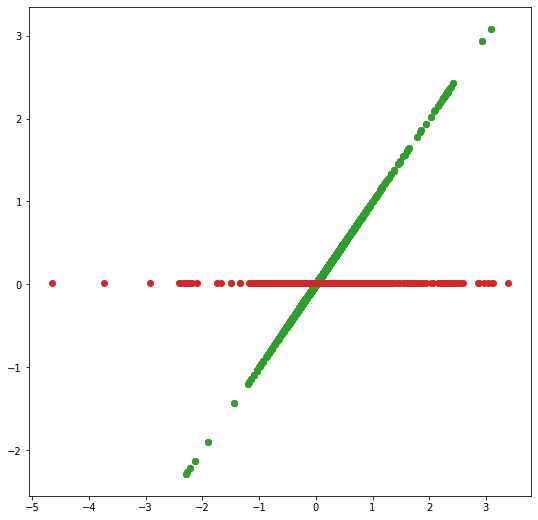

In [76]:
plt.figure(figsize=(9, 9))
plt.scatter(y_validate.logerror, y_validate.yhat_poly_1, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_poly_2, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_validate.logerror, y_validate.yhat_poly_3, label='Polynomial Regression Model Predictions', marker='o')
plt.scatter(y_train.logerror, y_train.yhat_baseline, label='Baseline Predicitions', marker='o')